# 第I部
# 第7章 分散分析

In [1]:
pkgs <- c("pipeR", "dplyr", "tidyr", "ggplot2", "readr", "readxl")
lapply(pkgs, require, character.only = TRUE)

Loading required package: pipeR
Loading required package: dplyr

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: tidyr
Loading required package: ggplot2
Loading required package: readr
Loading required package: readxl


[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

In [2]:
d <- read_csv("teaching_methods.csv")
head(d)

,ID,名前,性別,数学,統計,心理学テスト,統計テスト1,統計テスト2,指導法
1,1,大村,男,嫌い,好き,13,6,10,C
2,2,本多,男,嫌い,好き,14,10,13,B
3,3,川崎,男,好き,好き,7,6,8,B
4,4,多村,男,好き,好き,12,10,15,A
5,5,松中,男,嫌い,嫌い,10,5,8,B
6,6,小久保,男,嫌い,嫌い,6,3,6,C


In [3]:
str(d)

Classes 'tbl_df', 'tbl' and 'data.frame':	20 obs. of  9 variables:
 $ ID          : int  1 2 3 4 5 6 7 8 9 10 ...
 $ 名前        : chr  "大村" "本多" "川崎" "多村" ...
 $ 性別        : chr  "男" "男" "男" "男" ...
 $ 数学        : chr  "嫌い" "嫌い" "好き" "好き" ...
 $ 統計        : chr  "好き" "好き" "好き" "好き" ...
 $ 心理学テスト: int  13 14 7 12 10 6 8 15 4 14 ...
 $ 統計テスト1 : int  6 10 6 10 5 3 5 9 3 3 ...
 $ 統計テスト2 : int  10 13 8 15 8 6 9 10 7 3 ...
 $ 指導法      : chr  "C" "B" "B" "A" ...


In [3]:
names(d) <- c("id", "name", "sex","math", "stat", "psy_test", "stat_test1", "stat_test2", "teaching_method")

In [4]:
library(rlist)

In [5]:
library(purrr)


Attaching package: 'purrr'

The following object is masked from 'package:dplyr':

    order_by



* 指導法ごとの統計テスト2の点数

In [6]:
d %>>% 
#     dplyr::select(stat_test2, teaching_method) %>>% 
    split(.$teaching_method) %>>% 
    purrr::map(~ .[["stat_test2"]]) %>>% 
    rlist::list.cbind()

A,B,C,D
15,13,10,10
9,8,6,7
18,8,11,3
14,12,7,5
18,7,12,7


## 7.1 一元配置分散分析（対応なし）

* 帰無仮説: 4群の母平均は等しい
* 検定統計量$F$: 帰無仮説が正しいとき，自由度$df_1$，$df_2$のF分布に従う

$$ F = \frac{\mbox{群間平方和 / 群間の自由度}}{\mbox{群内平方和 / 群内の自由度}} $$

In [8]:
?df

FDist {stats},R Documentation
"x, q",vector of quantiles.
p,vector of probabilities.
n,"number of observations. If length(n) > 1, the length is taken to be the number required."
"df1, df2",degrees of freedom. Inf is allowed.
ncp,non-centrality parameter. If omitted the central F is assumed.
"log, log.p","logical; if TRUE, probabilities p are given as log(p)."
lower.tail,"logical; if TRUE (default), probabilities are P[X ≤ x], otherwise, P[X > x]."


In [7]:
options(repr.plot.width = 4, repr.plot.height = 4)

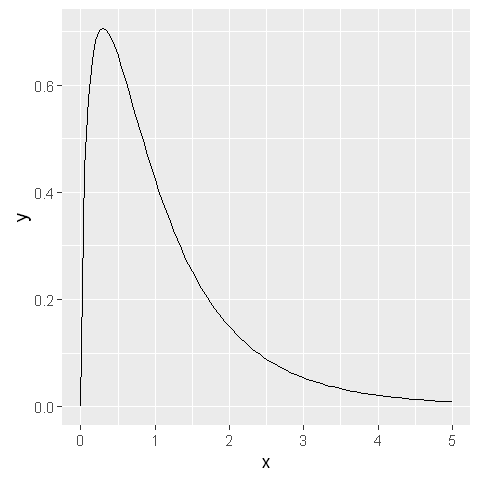

In [10]:
ggplot(data.frame(x = c(0:5)), aes(x)) + 
    stat_function(fun = df, args = list(df1 = 3, df2 = 16))

* 有意水準: 5%，片側検定
* 検定統計量の実現値

In [8]:
dd <- d %>>% 
    select(stat_test2, teaching_method) %>>% 
    mutate(teaching_method = factor(teaching_method))
str(dd)

Classes 'tbl_df', 'tbl' and 'data.frame':	20 obs. of  2 variables:
 $ stat_test2     : int  10 13 8 15 8 6 9 10 7 3 ...
 $ teaching_method: Factor w/ 4 levels "A","B","C","D": 3 2 2 1 2 3 1 4 4 4 ...


* `oneway.test()`

In [12]:
oneway.test(dd$stat_test2 ~ dd$teaching_method, var.equal = TRUE)


	One-way analysis of means

data:  dd$stat_test2 and dd$teaching_method
F = 7.1111, num df = 3, denom df = 16, p-value = 0.002988


* `aov()`

In [13]:
aov(dd$stat_test2 ~ dd$teaching_method)

Call:
   aov(formula = dd$stat_test2 ~ dd$teaching_method)

Terms:
                dd$teaching_method Residuals
Sum of Squares                 184       138
Deg. of Freedom                  3        16

Residual standard error: 2.936835
Estimated effects may be unbalanced

In [14]:
aov(dd$stat_test2 ~ dd$teaching_method) %>>% summary

                   Df Sum Sq Mean Sq F value  Pr(>F)   
dd$teaching_method  3    184   61.33   7.111 0.00299 **
Residuals          16    138    8.62                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

* `anova()`

In [15]:
lm(dd$stat_test2 ~ dd$teaching_method) %>>% anova

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
dd$teaching_method,3,184,61.33333,7.111111,0.002987783
Residuals,16,138,8.625,NA,NA


### 7.1.2 平方和の分解

* 群内平方和

In [82]:
intra_group_sq_sum <- dd %>>% 
    group_by(teaching_method) %>>%
    mutate_each(funs(my_fun = stat_test2 - mean(stat_test2))) %>>%
    ungroup %>>%
    mutate(stat_test2 = stat_test2^2) %>>%
    summarise(res = sum(stat_test2)) %>>%
    (.[["res"]])
intra_group_sq_sum

[1] 138

* 群間平方和

In [98]:
all_mean <- dd$stat_test2 %>>% mean
inter_group_sq_sum <- dd %>>% 
    group_by(teaching_method) %>>%
    summarise_each(funs(mean, n())) %>>%
    mutate(dev_sq_sum = (mean - all_mean)^2 * n) %>>%
    summarise(res = sum(dev_sq_sum)) %>>%
    (.[["res"]])
inter_group_sq_sum

[1] 184

* 全体平方和

In [121]:
all_sq_sum <- dd %>>% 
    mutate(dev_sq_sum = (stat_test2 - all_mean)^2) %>>%
    summarise(res = sum(dev_sq_sum)) %>>%
    (.[["res"]])
all_sq_sum

[1] 322

分散分析表との対応を見る

In [29]:
aov(dd$stat_test2 ~ dd$teaching_method) %>>% summary

                   Df Sum Sq Mean Sq F value  Pr(>F)   
dd$teaching_method  3    184   61.33   7.111 0.00299 **
Residuals          16    138    8.62                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

* 全体平方和 = 群間平方和 + 群内平方和

In [109]:
inter_group_sq_sum + intra_group_sq_sum

[1] 322

自由度

* 群間: 群の数 - 1

In [112]:
df_inter <- (unique(dd$teaching_method) %>>% length) - 1
df_inter

[1] 3

* 郡内: sum(各群のデータ数 - 1)

In [118]:
df_intra <- dd %>>% 
    group_by(teaching_method) %>>% 
    summarise(n = n()) %>>%
    ungroup %>>%
    summarise(res = sum(n - 1)) %>>%
    (.[["res"]])
df_intra

[1] 16

* 全データ: 全データ数 - 1

In [120]:
df_all <- length(dd$stat_test2) - 1
df_all

[1] 19

全データ = 群間 + 群内

In [34]:
df_inter + df_intra

[1] 19

In [35]:
inter_mean_sq <- inter_group_sq_sum / df_inter
inter_mean_sq

[1] 61.33333

In [36]:
intra_mean_sq <- intra_group_sq_sum / df_intra
intra_mean_sq

[1] 8.625

全体平方和を全体の自由度で割った平均平方は、全データの不偏分散となる

In [37]:
all_sq_sum / df_all

[1] 16.94737

In [38]:
var(d$stat_test2)

[1] 16.94737

* $F$ 値

In [39]:
f_value <- inter_mean_sq / intra_mean_sq
f_value

[1] 7.111111

In [40]:
devtools::session_info()

Session info -------------------------------------------------------------------
Packages -----------------------------------------------------------------------
Session info -------------------------------------------------------------------
Packages -----------------------------------------------------------------------


 setting  value                       
 version  R version 3.2.3 (2015-12-10)
 system   x86_64, mingw32             
 ui       RTerm                       
 language en                          
 collate  Japanese_Japan.932          
 tz       Asia/Tokyo                  
 date     2016-05-26                  

 package    * version date       source                            
 assertthat   0.1     2013-12-06 CRAN (R 3.2.1)                    
 base64enc    0.1-3   2015-07-28 CRAN (R 3.2.2)                    
 chron        2.3-47  2015-06-24 CRAN (R 3.2.2)                    
 colorspace   1.2-6   2015-03-11 CRAN (R 3.2.1)                    
 data.table   1.9.6   2015-09-19 CRAN (R 3.2.2)                    
 DBI          0.3.1   2014-09-24 CRAN (R 3.2.1)                    
 devtools     1.10.0  2016-01-23 CRAN (R 3.2.3)                    
 digest       0.6.9   2016-01-08 CRAN (R 3.2.3)                    
 dplyr      * 0.4.3   2015-09-01 CRAN (R 3.2.2)                    
 evalua